## **Marketing Analysis** ##

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime
import matplotlib.pyplot as plt

## **Defining Goals** ##

* How much sales amount from each product category?(Descriptive)
* What can we infer about this business based on Marketing KPI (AOV, MER)?
* What can we infer about this business based on Customer KPI (RCR,CAC)?
* What action can be applied to prevent customer retention while also gained new one?

## **Gathering Data Info** ##

In [127]:
sales_df = pd.read_csv('D:\My AI Project\Grocery and Marketing\Data\Online_Sales.csv')
tax_df = pd.read_csv('D:\My AI Project\Grocery and Marketing\Data\Tax_amount.csv')
marketing_spent_df = pd.read_csv('D:\My AI Project\Grocery and Marketing\Data\Marketing_Spend.csv')
discount_df = pd.read_csv('D:\My AI Project\Grocery and Marketing\Data\Discount_Coupon.csv')
customer_df = pd.read_csv('D:\My AI Project\Grocery and Marketing\Data\CustomersData.csv')


df_list = [sales_df, tax_df,marketing_spent_df, discount_df, customer_df]

<>:1: SyntaxWarning:

invalid escape sequence '\M'

<>:2: SyntaxWarning:

invalid escape sequence '\M'

<>:3: SyntaxWarning:

invalid escape sequence '\M'

<>:4: SyntaxWarning:

invalid escape sequence '\M'

<>:5: SyntaxWarning:

invalid escape sequence '\M'

<>:1: SyntaxWarning:

invalid escape sequence '\M'

<>:2: SyntaxWarning:

invalid escape sequence '\M'

<>:3: SyntaxWarning:

invalid escape sequence '\M'

<>:4: SyntaxWarning:

invalid escape sequence '\M'

<>:5: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\INTEL\AppData\Local\Temp\ipykernel_1316\3971222950.py:1: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\INTEL\AppData\Local\Temp\ipykernel_1316\3971222950.py:2: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\INTEL\AppData\Local\Temp\ipykernel_1316\3971222950.py:3: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\INTEL\AppData\Local\Temp\ipykernel_1316\3971222950.py:4: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\INTEL\AppData\Local\Tem

### **Cleaning Data** ##

In [128]:
print(sales_df.isnull().sum())

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64


After looking at data, **there are no null values**. Next, we can move on to check **outliers**

In [129]:
print(sales_df.describe().reset_index())

   index   CustomerID  Transaction_ID      Quantity     Avg_Price  \
0  count  52924.00000    52924.000000  52924.000000  52924.000000   
1   mean  15346.70981    32409.825675      4.497638     52.237646   
2    std   1766.55602     8648.668977     20.104711     64.006882   
3    min  12346.00000    16679.000000      1.000000      0.390000   
4    25%  13869.00000    25384.000000      1.000000      5.700000   
5    50%  15311.00000    32625.500000      1.000000     16.990000   
6    75%  16996.25000    39126.250000      2.000000    102.130000   
7    max  18283.00000    48497.000000    900.000000    355.740000   

   Delivery_Charges  
0      52924.000000  
1         10.517630  
2         19.475613  
3          0.000000  
4          6.000000  
5          6.000000  
6          6.500000  
7        521.360000  


This data is actually make sense. FYI, not all outliers must be eliminated from the dataset. Although it must be separated from our data, we will find interesting info related to outlier later.

In [130]:
# Explore transaction date
month_order = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

sales_df['Month'] =  pd.to_datetime(sales_df['Transaction_Date']).dt.month
sales_df['Month'] = sales_df['Month'].map(month_order)

sales_df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan
...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec


In [131]:
#lets proceed into tax amount
print(tax_df.isnull().sum())

tax_df

Product_Category    0
GST                 0
dtype: int64


,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [132]:
#lets check customer data
print(customer_df.describe())

#check null values
print(customer_df.isnull().sum())

         CustomerID  Tenure_Months
count   1468.000000    1468.000000
mean   15314.386240      25.912125
std     1744.000367      13.959667
min    12346.000000       2.000000
25%    13830.500000      14.000000
50%    15300.000000      26.000000
75%    16882.250000      38.000000
max    18283.000000      50.000000
CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64


In [133]:
#Checking discount dataframe
print(discount_df)

#check null values
print(discount_df.isnull().sum())

    Month      Product_Category Coupon_Code  Discount_pct
0     Jan               Apparel      SALE10            10
1     Feb               Apparel      SALE20            20
2     Mar               Apparel      SALE30            30
3     Jan              Nest-USA      ELEC10            10
4     Feb              Nest-USA      ELEC20            20
..    ...                   ...         ...           ...
199   Nov  Notebooks & Journals        NJ20            20
200   Dec  Notebooks & Journals        NJ30            30
201   Oct               Android       AND10            10
202   Nov               Android       AND20            20
203   Dec               Android       AND30            30

[204 rows x 4 columns]
Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64


As you can see, on "Discount_pct" column, the value is in integer. To make it more logical. What if we convert the value into decimal value instead of percentage?

In [134]:
discount_df['Discount_pct'] = discount_df['Discount_pct'] / 100.0

In [135]:
#marketing spend data cleaning and standardization
print(marketing_spent_df.isnull().sum()) # no null values

#create new feature that extract months from data
marketing_spent_df['Month'] = pd.to_datetime(marketing_spent_df['Date']).dt.month
marketing_spent_df['Month'] = marketing_spent_df['Month'].map(month_order)

marketing_spent_df

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64


,Date,Offline_Spend,Online_Spend,Month
0,1/1/2019,4500,2424.50,Jan
1,1/2/2019,4500,3480.36,Jan
2,1/3/2019,4500,1576.38,Jan
3,1/4/2019,4500,2928.55,Jan
4,1/5/2019,4500,4055.30,Jan
...,...,...,...,...
360,12/27/2019,4000,3396.87,Dec
361,12/28/2019,4000,3246.84,Dec
362,12/29/2019,4000,2546.58,Dec
363,12/30/2019,4000,674.31,Dec


In [136]:
#merge sales data with tax and discount, to calculate sales anmount
sales_disc = sales_df.merge(
    discount_df,
    on = ['Month','Product_Category'],
    how = 'left')
sales_disc

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,OFF10,0.1
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,0.1
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,AIO10,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,0.3
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec,SALE30,0.3
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,0.3
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,0.3


In [137]:
tax_dict = tax_df.set_index('Product_Category')['GST'].to_dict()
tax_dict

{'Nest-USA': 0.1,
 'Office': 0.1,
 'Apparel': 0.18,
 'Bags': 0.18,
 'Drinkware': 0.18,
 'Lifestyle': 0.18,
 'Notebooks & Journals': 0.05,
 'Headgear': 0.05,
 'Waze': 0.18,
 'Fun': 0.18,
 'Nest-Canada': 0.1,
 'Backpacks': 0.1,
 'Google': 0.1,
 'Bottles': 0.05,
 'Gift Cards': 0.05,
 'More Bags': 0.18,
 'Housewares': 0.12,
 'Android': 0.1,
 'Accessories': 0.1,
 'Nest': 0.05}

In [138]:
#now we're mapping those tax values into our product category data in main data (sales_disc dataframe)
sales_disc['tax'] = sales_disc['Product_Category'].map(tax_dict)

#visualize
sales_disc

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,tax
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1,0.10
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1,0.10
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,OFF10,0.1,0.10
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,0.1,0.18
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,AIO10,0.1,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,0.3,0.10
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec,SALE30,0.3,0.18
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,0.3,0.10
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,0.3,0.10


In [139]:
#after combining all tables, lets remove outlier data from data
def check_outlier (df,columns):
    for column in columns:
        Q1,Q2,Q3 =df[column].quantile([0.25,0.50,0.75])

        IQR = Q3-Q1
        print(f'Interquartile value : {IQR}')

        tolerable_Max = Q3 + 1.5*IQR
        tolerable_Min = abs(Q1 - 1.5*IQR)
        print(f'Max tolerated value in {column} : {tolerable_Max}, \n minimum tolerated value {column} : {tolerable_Min}')

    #Nilai Harga tidak mungkin negatif, kita akan cleaning hanya data diatas Max saja.Untuk data minimum kemungkinan akan kita beri nilai 1
    kondisi_lower_than = df[column].min() < tolerable_Min
    kondisi_higher_than = df[column].max() > tolerable_Max

    outlier_indices = df[(df[column] < tolerable_Min) | (df[column] > tolerable_Max)].index
    #max_value_from_df = database_name[column_name].max()
    #min_value_from_df = database_name[column_name].min()
    if kondisi_lower_than == True or kondisi_higher_than == True:
        print (f'Max value that exceed interquartile threshold in {column} :  {df[column].max()}, minimum value that exceed interquartile threshold :  {df[column].min()}')
        return outlier_indices
    else:
        print("No outlier found")
        return []
        
def separate_outlier(df,column):
   all_outlier_indices = set()

   #find all outlier
   for col in column:
    print(f'CHECKING OUTLIER')
    outlier_indices = check_outlier(df, column)
    all_outlier_indices.update(outlier_indices)

    #convertion index to list
    all_outlier_indices = list(all_outlier_indices)

    #outlier_df product
    outlier_df = df.loc[all_outlier_indices].copy()

    #remove all outlier from source of df
    clean_df = df.drop(all_outlier_indices)

    print(f'Amount of starting rows : {len(df)}')
    print(f'Identified outlier rows : {len(outlier_df)}')
    print(f'Rows left in the source dataframe : {len(clean_df)}')
    return clean_df, outlier_df

Now, we have done combining three main tables. Next is to calculate revenue based on quantity, price per quantity, tax discount dan delivery charges.

In [140]:
quantity = sales_disc['Quantity']
avg_price = sales_disc['Avg_Price']
discount = sales_disc['Discount_pct']
tax = sales_disc['tax']
delivery_charges = sales_disc['Delivery_Charges']

#invoice equation for used coupon
def invoice_equation (row):
    if row['Coupon_Status'] =='Used':
        compute_invoice = (row['Quantity'] * row['Avg_Price']) * (1- row['Discount_pct']) * (1 + row['tax']) + row['Delivery_Charges']
    else:
        compute_invoice = (row['Quantity'] * row['Avg_Price']) * (1 + row['tax']) + row['Delivery_Charges']
    return round(compute_invoice,2)

In [141]:
#use the invoice calculator
sales_disc['Invoice'] = sales_disc.apply(invoice_equation, axis = 1)
sales_disc

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,tax,Invoice
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1,0.10,158.67
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,0.1,0.10,158.67
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,OFF10,0.1,0.10,8.53
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,0.1,0.18,109.93
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,AIO10,0.1,0.18,24.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,0.3,0.10,139.93
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec,SALE30,0.3,0.18,46.91
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,0.3,0.10,123.45
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,0.3,0.10,449.36


## **Data Cleaning** ##

In [142]:
marketing_spent_df = marketing_spent_df.rename(columns = {'Date':'Transaction_Date'})
#merging tables with 
sales_df = sales_disc.merge(
    marketing_spent_df,on = 'Transaction_Date',how = 'inner')
sales_df = sales_df.merge(
    customer_df, on = 'CustomerID', how = 'inner'
)

In [143]:
sales_df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,tax,Invoice,Offline_Spend,Online_Spend,Month_y,Gender,Location,Tenure_Months
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,ELEC10,0.1,0.10,158.67,4500,2424.50,Jan,M,Chicago,12
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,ELEC10,0.1,0.10,158.67,4500,2424.50,Jan,M,Chicago,12
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,OFF10,0.1,0.10,8.53,4500,2424.50,Jan,M,Chicago,12
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,SALE10,0.1,0.18,109.93,4500,2424.50,Jan,M,Chicago,12
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,AIO10,0.1,0.18,24.02,4500,2424.50,Jan,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,ELEC30,0.3,0.10,139.93,4000,2058.75,Dec,F,New York,45
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,SALE30,0.3,0.18,46.91,4000,2058.75,Dec,F,New York,45
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,ELEC30,0.3,0.10,123.45,4000,2058.75,Dec,F,New York,45
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,ELEC30,0.3,0.10,449.36,4000,2058.75,Dec,F,California,7


In [144]:
#check outlier on the table
numeric_column = ['Quantity','Delivery_Charges','Invoice','Offline_Spend','Online_Spend']
outlier_indices = check_outlier(sales_df,numeric_column)

Interquartile value : 1.0
Max tolerated value in Quantity : 3.5, 
 minimum tolerated value Quantity : 0.5
Interquartile value : 0.5
Max tolerated value in Delivery_Charges : 7.25, 
 minimum tolerated value Delivery_Charges : 5.25
Interquartile value : 117.24000000000001
Max tolerated value in Invoice : 313.26, 
 minimum tolerated value Invoice : 155.70000000000002
Interquartile value : 1000.0
Max tolerated value in Offline_Spend : 5000.0, 
 minimum tolerated value Offline_Spend : 1000.0
Interquartile value : 1172.7199999999998
Max tolerated value in Online_Spend : 4184.429999999999, 
 minimum tolerated value Online_Spend : 506.4499999999996
Max value that exceed interquartile threshold in Online_Spend :  4556.93, minimum value that exceed interquartile threshold :  320.25


In [145]:
#separate the outlier value into new table.
clean_sales_df,outlier_sales_df = separate_outlier(df = sales_df,column = numeric_column)

CHECKING OUTLIER
Interquartile value : 1.0
Max tolerated value in Quantity : 3.5, 
 minimum tolerated value Quantity : 0.5
Interquartile value : 0.5
Max tolerated value in Delivery_Charges : 7.25, 
 minimum tolerated value Delivery_Charges : 5.25
Interquartile value : 117.24000000000001
Max tolerated value in Invoice : 313.26, 
 minimum tolerated value Invoice : 155.70000000000002
Interquartile value : 1000.0
Max tolerated value in Offline_Spend : 5000.0, 
 minimum tolerated value Offline_Spend : 1000.0
Interquartile value : 1172.7199999999998
Max tolerated value in Online_Spend : 4184.429999999999, 
 minimum tolerated value Online_Spend : 506.4499999999996
Max value that exceed interquartile threshold in Online_Spend :  4556.93, minimum value that exceed interquartile threshold :  320.25
Amount of starting rows : 52924
Identified outlier rows : 914
Rows left in the source dataframe : 52010


In [146]:
outlier_sales_df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,tax,Invoice,Offline_Spend,Online_Spend,Month_y,Gender,Location,Tenure_Months
2048,17732,18069,1/17/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,0.1,0.10,158.67,3000,417.73,Jan,F,Chicago,8
2049,12855,18069,1/17/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Used,...,ELEC10,0.1,0.10,249.58,3000,417.73,Jan,F,New York,33
2050,12855,18070,1/17/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,4,122.77,6.5,Clicked,...,ELEC10,0.1,0.10,546.69,3000,417.73,Jan,F,New York,33
2051,12855,18071,1/17/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,0.1,0.10,158.67,3000,417.73,Jan,F,New York,33
2052,17850,18072,1/17/2019,GGOEGDHB072099,Google Insulated Stainless Steel Bottle,Drinkware,1,20.62,6.5,Used,...,EXTRA10,0.1,0.18,28.40,3000,417.73,Jan,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,17732,18066,1/17/2019,GGOEGOAC021799,Ballpoint Pen Blue,Office,36,0.79,41.3,Clicked,...,OFF10,0.1,0.10,72.58,3000,417.73,Jan,F,Chicago,8
2044,17732,18066,1/17/2019,GGOEGOCB017499,Leatherette Journal,Office,36,8.82,41.3,Not Used,...,OFF10,0.1,0.10,390.57,3000,417.73,Jan,F,Chicago,8
2045,17732,18067,1/17/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,...,ELEC10,0.1,0.10,276.59,3000,417.73,Jan,F,Chicago,8
2046,17732,18068,1/17/2019,GGOEGHGC019799,Google Sunglasses,Lifestyle,1,3.61,6.5,Not Used,...,EXTRA10,0.1,0.18,10.76,3000,417.73,Jan,F,Chicago,8


## **Exploratory Data Analysis : Sales & Product** ##

In [147]:
clean_sales_df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,tax,Invoice,Offline_Spend,Online_Spend,Month_y,Gender,Location,Tenure_Months
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,ELEC10,0.1,0.10,158.67,4500,2424.50,Jan,M,Chicago,12
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,ELEC10,0.1,0.10,158.67,4500,2424.50,Jan,M,Chicago,12
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,OFF10,0.1,0.10,8.53,4500,2424.50,Jan,M,Chicago,12
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,SALE10,0.1,0.18,109.93,4500,2424.50,Jan,M,Chicago,12
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,AIO10,0.1,0.18,24.02,4500,2424.50,Jan,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,ELEC30,0.3,0.10,139.93,4000,2058.75,Dec,F,New York,45
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,SALE30,0.3,0.18,46.91,4000,2058.75,Dec,F,New York,45
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,ELEC30,0.3,0.10,123.45,4000,2058.75,Dec,F,New York,45
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,ELEC30,0.3,0.10,449.36,4000,2058.75,Dec,F,California,7


In [148]:
#clean_sales_df.to_csv('clean_sales.csv')

                                 Product_Description    Invoice
0              Nest Cam Indoor Security Camera - USA  555365.42
1             Nest Cam Outdoor Security Camera - USA  656095.58
2      Nest Learning Thermostat 3rd Gen-USA - Copper   72342.97
3  Nest Learning Thermostat 3rd Gen-USA - Stainle...  716880.58
4       Nest Learning Thermostat 3rd Gen-USA - White  211548.58
5    Nest Protect Smoke + CO Black Battery Alarm-USA    1831.71
6      Nest Protect Smoke + CO Black Wired Alarm-USA    2799.17
7    Nest Protect Smoke + CO White Battery Alarm-USA  221888.11
8      Nest Protect Smoke + CO White Wired Alarm-USA  219846.24


C:\Users\INTEL\AppData\Local\Temp\ipykernel_1316\1377203900.py:22: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



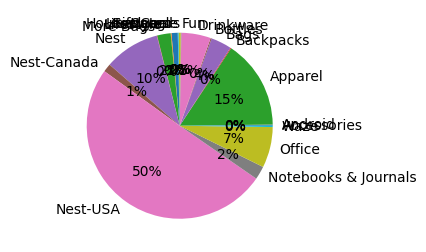

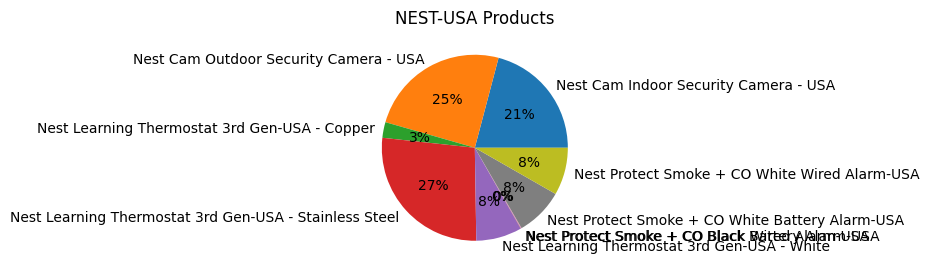

In [191]:
sales_per_product = pd.concat([clean_sales_df.groupby('Product_Category')['Invoice'].sum().reset_index()])
total_sales = sales_per_product['Invoice'].sum()
sales_per_product['percentage'] = (sales_per_product['Invoice']/total_sales)*100

#plotting sales into pie chart to see how each categories of product contribute to yearly sales
%matplotlib inline
plt.style.use('default')
fig,ax = plt.subplots(figsize=(3,6))
ax.pie(sales_per_product['percentage'],labels = sales_per_product['Product_Category'],autopct = '%.0f%%')

#get unique NEST-USA products
category_name = 'Nest-USA'
df_category = clean_sales_df[clean_sales_df['Product_Category']== category_name]
#get product and its total sales 
nest_usa_product_sales = df_category.groupby('Product_Description')['Invoice'].sum().reset_index()
print(nest_usa_product_sales)

plt.style.use('default')
fig,ax = plt.subplots(figsize=(3,5))
ax.pie(nest_usa_product_sales['Invoice'], labels = nest_usa_product_sales['Product_Description'], autopct = '%.0f%%')
ax.set_title('NEST-USA Products')
plt.tight_layout()
plt.show()

Answer for 1st goal : Most of the company revenue fulfilled by Nest-USA products with 54% percentage. With total yearly revenue of 2,383,642 USD.

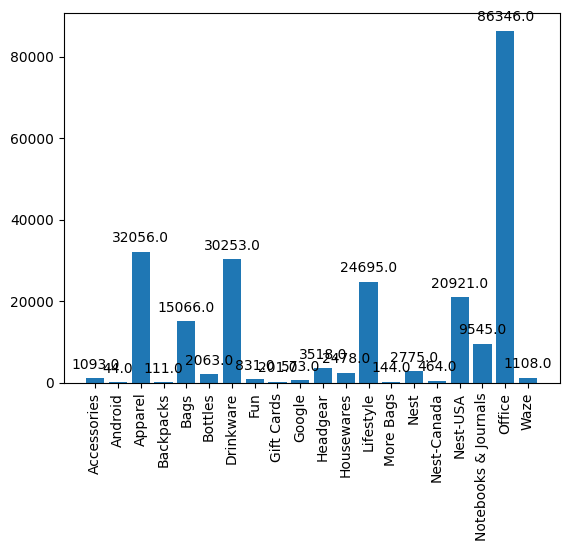

In [192]:
quantity_per_product = pd.DataFrame(clean_sales_df.groupby('Product_Category')['Quantity'].sum().reset_index())
total_quantity = quantity_per_product['Quantity'].sum()

#lets create a pie figure to see quantity product sold per month
plt.style.use('default')
fig,ax = plt.subplots()
ax.bar(x = quantity_per_product['Product_Category'],height = quantity_per_product['Quantity'])
plt.xticks(rotation = 90)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("image.png")

Well, this is the surprising things happened, NEST-USA, although contribute 55% sales to yearly sales, is not the top sold product. Product that mostly bought by the customer are 'Office Equipment' category with 88383 units sold. 

## **Sales & Marketing Data Analysis**

   Month_x    Invoice
4      Jan  472377.35
3      Feb  358834.57
7      Mar  411623.35
0      Apr  475184.48
8      May  362384.23
6      Jun  350271.73
5      Jul  440895.52
1      Aug  475048.21
11     Sep  396348.99
10     Oct  480532.77
9      Nov  500101.61
2      Dec  556114.84


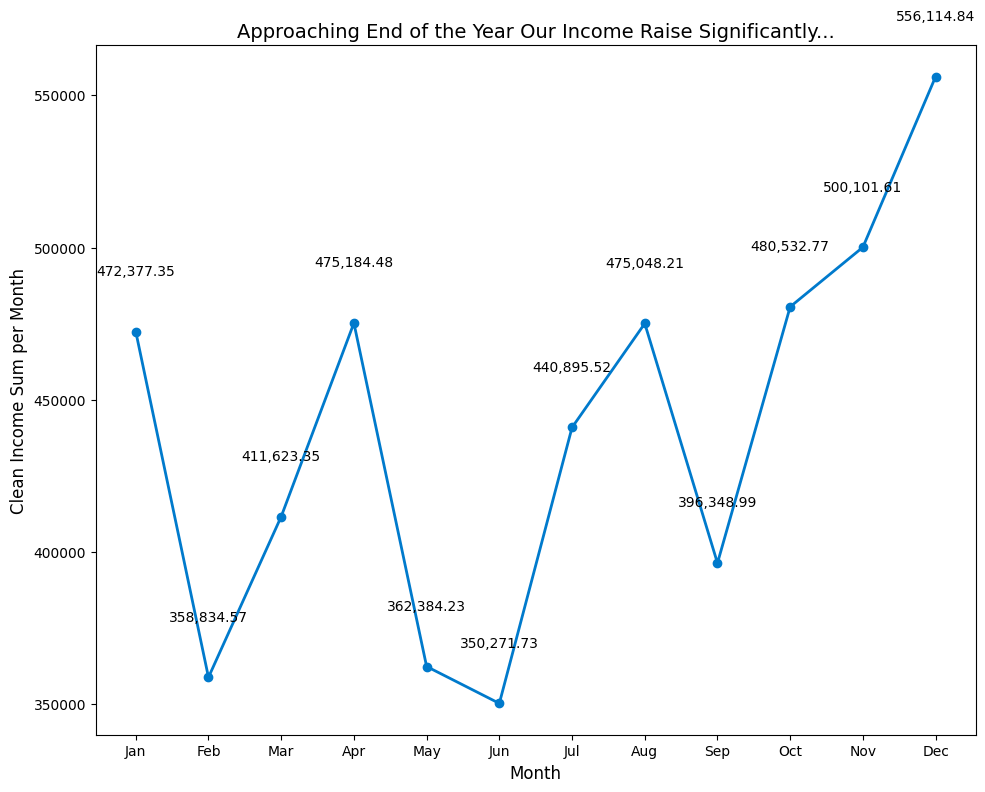

In [193]:
#Sales Trend
month_order = ['Jan','Feb','Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales_trend = pd.DataFrame(clean_sales_df.groupby('Month_x')['Invoice'].sum().reset_index())
sales_trend['Month_x'] = pd.Categorical(sales_trend['Month_x'],categories = month_order, ordered = True)
sales_trend = sales_trend.sort_values(by="Month_x")
print(sales_trend)

plt.style.use('default')
plt.figure(figsize=(10,8))
plt.plot(sales_trend['Month_x'], sales_trend['Invoice'], marker = 'o', linewidth = 2, color = '#007acc')
plt.title('Approaching End of the Year Our Income Raise Significantly...', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Clean Income Sum per Month', fontsize = 12)
for i, val in enumerate(sales_trend['Invoice']):
    plt.text(i, val + 0.3*np.std(sales_trend['Invoice']), f'{val:,}', ha='center')

plt.tight_layout()
plt.savefig('sales trend_mpl.png', dpi=300)
plt.show()
#plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        Location     Invoice
0     California  1621091.40
1        Chicago  1843462.65
2     New Jersey   456915.85
3       New York  1066443.62
4  Washington DC   291804.13


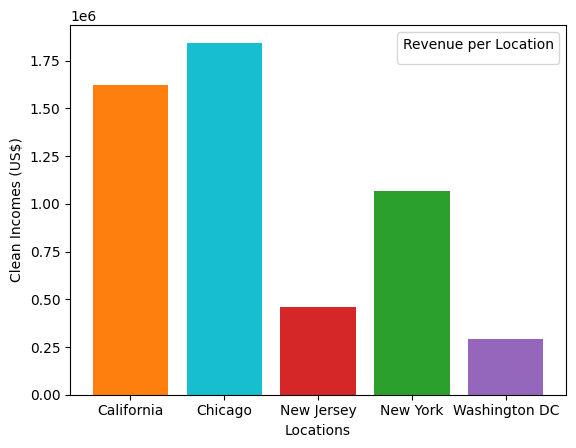

In [194]:
#How are incomes gained per location
sales_trend_per_loc = pd.DataFrame(clean_sales_df.groupby('Location')['Invoice'].sum().reset_index())
print(sales_trend_per_loc)

fig,ax = plt.subplots()
plt.style.use('default')
bar_labels = sales_trend_per_loc['Location']
bar_colors = ['tab:orange', 'tab:cyan', 'tab:red','tab:green','tab:purple']

ax.bar(sales_trend_per_loc['Location'],sales_trend_per_loc['Invoice'],color = bar_colors)
ax.set_xlabel('Locations')
ax.set_ylabel('Clean Incomes (US$)')
ax.legend(title = 'Revenue per Location')

plt.show()

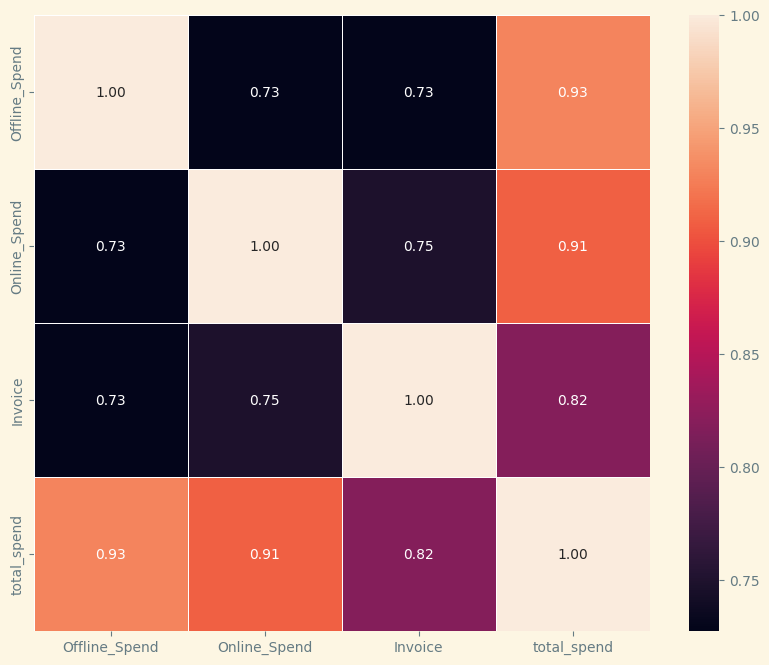

In [185]:
#marketing spend vs income
spend_vs_income = clean_sales_df.groupby('Month_x',as_index=True).agg(
    {'Offline_Spend':'sum',
    'Online_Spend': 'sum',
    'Invoice' : 'sum'
})

spend_vs_income['total_spend'] = spend_vs_income['Offline_Spend'] + spend_vs_income['Online_Spend']

#correlation
plt.style.use('Solarize_Light2')
plt.subplots(figsize = (10,8))
sns.heatmap(spend_vs_income.corr(method ='spearman'),annot = True, square = True, linewidths = 0.5, fmt = '.2f')
plt.show()

It seems that our online spend and offline marketing spend positively correlates with clean income. But to be sure what kind of phenomenon we're seeing, let's visualize it with line plot

In [154]:
import plotly.graph_objects as go

spend_vs_income = spend_vs_income.reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x = spend_vs_income['Month_x'],y = spend_vs_income['Offline_Spend'], mode = 'lines', name = 'Offline Spend'))
fig.add_trace(go.Scatter(x = spend_vs_income['Month_x'], y = spend_vs_income['Online_Spend'], mode = 'lines', name = 'Online Spend'))
fig.add_trace(go.Scatter(x = spend_vs_income['Month_x'], y = spend_vs_income['Invoice'], mode = 'lines', name = 'clean_income'))

fig.update_layout(title = 'Stop Throwing Money for Marketing Every Day:( ',
xaxis_title = 'Month',
yaxis_title = 'Amount (US$)'
)
fig.show()

Something wrong here, we spend so much money everyday for marketing campaign. It is not very worth it if you ask my opinion compared to the clean income we've got each month

In [155]:
#Average Order Value
AOV_DATAFRAME = pd.DataFrame(clean_sales_df.groupby(['Month_x','Location']).agg(
    {'Invoice':'sum',
    'Transaction_ID':'count'}).reset_index())
AOV_DATAFRAME['Month_x'] = pd.Categorical(AOV_DATAFRAME['Month_x'], categories = month_order, ordered = True)
AOV_DATAFRAME = AOV_DATAFRAME.sort_values(by="Month_x")
AOV_DATAFRAME['AOV'] = (AOV_DATAFRAME['Invoice'] / AOV_DATAFRAME['Transaction_ID']).round(2)

#AOV per city filtering
TARGET_CITY = ['Chicago', 'New York', 'California','New Jersey','Washington DC']
AOV_FILTERED_DATAFRAME = AOV_DATAFRAME[AOV_DATAFRAME['Location'].isin(TARGET_CITY)]

fig = go.Figure()
for city in TARGET_CITY:
    data_location = AOV_FILTERED_DATAFRAME[AOV_FILTERED_DATAFRAME['Location'] == city]
    fig.add_trace(go.Scatter(x = data_location['Month_x'],
    y = data_location ['AOV'],
    mode = 'lines',
    name = city,
    fill = 'tozeroy',
    opacity = 0.5))

fig.update_layout(title = 'Average Order Value per City in One Year',
xaxis_title ='Month',
yaxis_title='AOV($)',
template='plotly_white')

fig.show()

The graph shows Average Order Value of customer living in 5 district in US. Peak of AOV reached by Washington DC customer (182.46 USD) in February, second peak reached by New Jersey customer in April(142.77 USD). Let's find out what product that had been bought by Washington DC customer in February

In [156]:
AOV_ANOMALIES = clean_sales_df[
    (clean_sales_df['Location'] == 'Washington DC') & 
    (clean_sales_df['Month_x'] == 'Feb')]

After checking into more detailed analysis according to AOV peak in February 2024 on Washington DC, I found this data. Lot of 'Office' category product had been sold, 4 of them are Google merchandise. Does Google hire lot of mew employee at Washington DC Google Hub?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


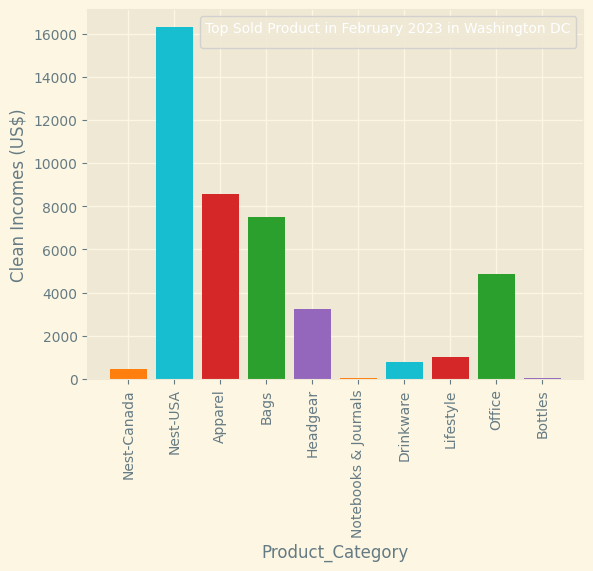

In [183]:
TOP_PRODUCT_PRICE_FEB = AOV_ANOMALIES.groupby('Product_Category').agg(
    {'Avg_Price':'mean',
    'Quantity' : 'sum',
    'Invoice' : 'sum',
    'Transaction_ID': 'nunique'}
).reset_index().sort_values(by = 'Avg_Price', ascending = False).head(10)

fig,ax = plt.subplots()

plt.style.use('Solarize_Light2')
bar_labels = TOP_PRODUCT_PRICE_FEB['Product_Category']
bar_colors = ['tab:orange', 'tab:cyan', 'tab:red','tab:green','tab:purple']

ax.bar(TOP_PRODUCT_PRICE_FEB['Product_Category'],TOP_PRODUCT_PRICE_FEB['Invoice'],color = bar_colors)
ax.tick_params('x', labelrotation=90)
ax.set_xlabel('Product_Category')
ax.set_ylabel('Clean Incomes (US$)')
ax.legend(title = 'Top Sold Product in February 2023 in Washington DC')

plt.show()

After checking on product's prices, only NEST-CANADA products have the priciest unit price with mean unit price USD 151, but only few customer bought the product. Second place gained by NEST-USA product which have unit price USD 122.54, not only pricy amount of transaction related to this product was the largest, with amount of transaction are 66 transactions.
If we go back to the beginning of the analysis, NEST-USA product are safety electronic product such as security cam, learning thermostat etc. 

## **Marketing Data Analysis**

To understand fully about this business, I want to calculate Customer Acquisition Cost. The aim is to understand better about the spend of marketing campaign and its impact to addition of company customer.

In [158]:
#Check ROI Return of Marketing Investments
CAC_DATAFRAME = pd.DataFrame(clean_sales_df.groupby('Month_x', as_index = True).agg(
    {'Invoice' : 'sum',
    'Offline_Spend' : 'sum',
    'Online_Spend': 'sum',
    }).reset_index())

CAC_DATAFRAME['Month_x'] = pd.Categorical(CAC_DATAFRAME['Month_x'], categories = month_order, ordered = True)
CAC_DATAFRAME = CAC_DATAFRAME.sort_values(by = 'Month_x')

#count amount of unique customerID per month frm clean_sales_df source data
N_CUSTOMER = clean_sales_df.groupby('Month_x')['CustomerID'].nunique().reset_index()
N_CUSTOMER.columns = ['Month_x', 'n_customers']

#merge with CAC_DATAFRAME
CAC_DATAFRAME = CAC_DATAFRAME.merge(N_CUSTOMER[['Month_x', 'n_customers']], on = 'Month_x', how = 'left')
CAC_DATAFRAME['total_marketing_spend'] = CAC_DATAFRAME['Offline_Spend'] + CAC_DATAFRAME['Online_Spend']

#count the delta between this month customers and yesterday amount of customer
CAC_DATAFRAME['customer_delta'] =  CAC_DATAFRAME['n_customers'].diff()

CAC_DATAFRAME['customer_delta'] = CAC_DATAFRAME['customer_delta'].fillna(0)

#CAC Computation
CAC_DATAFRAME['CAC'] = CAC_DATAFRAME.apply(lambda row: row['total_marketing_spend'] / row['customer_delta'] if row['customer_delta']> 0 else None, axis = 1)

CAC_DATAFRAME


,Month_x,Invoice,Offline_Spend,Online_Spend,n_customers,total_marketing_spend,customer_delta,CAC
0,Jan,472377.35,11810900,7609595.12,204,19420495.12,0.0,NaN
1,Feb,358834.57,8985400,5820857.57,107,14806257.57,-97.0,NaN
2,Mar,411623.35,10488500,6965280.31,208,17453780.31,101.0,1.728097e+05
3,Apr,475184.48,13459000,8196922.13,224,21655922.13,16.0,1.353495e+06
4,May,362384.23,9930000,7554008.82,199,17484008.82,-25.0,NaN
5,Jun,350271.73,11124000,7394771.23,254,18518771.23,55.0,3.367049e+05
6,Jul,440895.52,11366500,8993281.04,233,20359781.04,-21.0,NaN
7,Aug,475048.21,16834500,11551233.77,300,28385733.77,67.0,4.236677e+05
8,Sep,396348.99,11886500,7371126.34,193,19257626.34,-107.0,NaN
9,Oct,480532.77,12722500,7813772.39,210,20536272.39,17.0,1.208016e+06


Based on the calculation of **Customer Acquisition Cost**, our CAC is very large with **CAC value to the power of 5 or 6**, indicating that our spend for marketing campaign is so high, but the addition of new customer per month is very small. Which means our marketing campaign is **not that successful**. In February, May, September, and November some customers left our store. 

### **Marketing Efficiency Ratio (MER)**

In [159]:
CAC_DATAFRAME['MER'] = CAC_DATAFRAME['Invoice'] / CAC_DATAFRAME['total_marketing_spend']
CAC_DATAFRAME

,Month_x,Invoice,Offline_Spend,Online_Spend,n_customers,total_marketing_spend,customer_delta,CAC,MER
0,Jan,472377.35,11810900,7609595.12,204,19420495.12,0.0,NaN,0.024324
1,Feb,358834.57,8985400,5820857.57,107,14806257.57,-97.0,NaN,0.024235
2,Mar,411623.35,10488500,6965280.31,208,17453780.31,101.0,1.728097e+05,0.023584
3,Apr,475184.48,13459000,8196922.13,224,21655922.13,16.0,1.353495e+06,0.021942
4,May,362384.23,9930000,7554008.82,199,17484008.82,-25.0,NaN,0.020727
5,Jun,350271.73,11124000,7394771.23,254,18518771.23,55.0,3.367049e+05,0.018914
6,Jul,440895.52,11366500,8993281.04,233,20359781.04,-21.0,NaN,0.021655
7,Aug,475048.21,16834500,11551233.77,300,28385733.77,67.0,4.236677e+05,0.016735
8,Sep,396348.99,11886500,7371126.34,193,19257626.34,-107.0,NaN,0.020581
9,Oct,480532.77,12722500,7813772.39,210,20536272.39,17.0,1.208016e+06,0.023399


All our MER (Marketing Efficieny Ratio) are under 1. This indicate that our clean income can't cover most of our marketing spend each day, which means we must lessen marketing spend. 5000 dollars each day is much. What about if we spend **5000 dollars per month**?

In this segments, let's count customer metric such as Revenue per Customer, Repeat Customer Rate, and Customer Lifetime Value.

## **Customer Analysis**

In [160]:
#Calculate for Repeat Customer Rate
CUSTOMER_DF = clean_sales_df.groupby(['CustomerID','Month_x']).agg(
    {'Transaction_ID': 'nunique',
    'Invoice' : 'sum'}
).reset_index()
CUSTOMER_DF['repeat_customer'] = CUSTOMER_DF['Transaction_ID'].apply(lambda x: 1 if x  > 1 else 0)
RCR_PER_MONTH = CUSTOMER_DF.groupby('Month_x').agg(
    {'repeat_customer' : 'sum',
    'CustomerID' : 'nunique'}).reset_index()
RCR_PER_MONTH['RCR'] = RCR_PER_MONTH['repeat_customer']/RCR_PER_MONTH['CustomerID'] * 100
RCR_PER_MONTH['Month_x'] = pd.Categorical(RCR_PER_MONTH['Month_x'],categories = month_order, ordered = True)
RCR_PER_MONTH = RCR_PER_MONTH.sort_values(by="Month_x")
RCR_PER_MONTH

,Month_x,repeat_customer,CustomerID,RCR
4,Jan,174,204,85.294118
3,Feb,96,107,89.719626
7,Mar,181,208,87.019231
0,Apr,176,224,78.571429
8,May,160,199,80.402010
6,Jun,213,254,83.858268
5,Jul,187,233,80.257511
1,Aug,251,300,83.666667
11,Sep,155,193,80.310881
10,Oct,173,210,82.380952


In [161]:
import plotly.express as px
fig = px.line(RCR_PER_MONTH, x = 'Month_x',y= 'RCR', title = 'Repeat Customer Ratio')
fig.show()

**What can we conclude from this data?** : Our RCR values are between 78% and 91%. This is a **good sign**, most of our customers are back to buy again at our store. This could indicate that they are **satisfied** with product that sold in our store, or our services. Although most of our customer left us at April'23, we may conduct further research to this phenomena so that we can prevent same tragedy to happen in the future 

In [162]:
#Revenue per Customer
RPC_PER_MONTH = CUSTOMER_DF.groupby('Month_x').agg(
    {'Invoice' :'sum',
    'CustomerID' :'nunique'}).reset_index()

RPC_PER_MONTH.rename(columns = {
    'Invoice1' : 'Revenue',
    'CustomerID': 'Total Customer (per Month)'
})
RPC_PER_MONTH['Month_x'] = pd.Categorical(RPC_PER_MONTH['Month_x'], categories =  month_order, ordered = True)
RPC_PER_MONTH = RPC_PER_MONTH.sort_values(by = 'Month_x')

RPC_PER_MONTH['RPC'] = RPC_PER_MONTH['Invoice'] / RPC_PER_MONTH['CustomerID']
RPC_PER_MONTH['RPC'] = RPC_PER_MONTH['RPC'].round(2)

RPC_PER_MONTH

fig = px.bar(RPC_PER_MONTH, x = 'Month_x', y = 'RPC')
fig.show()


In [163]:
#Comparing RPC with CAC
RPC_PER_MONTH['CAC'] = pd.merge(RPC_PER_MONTH['Month_x'], CAC_DATAFRAME[['Month_x', 'CAC']], on = 'Month_x', how = 'left')['CAC']
print(RPC_PER_MONTH)


   Month_x    Invoice  CustomerID      RPC           CAC
4      Jan  472377.35         204  2315.58           NaN
3      Feb  358834.57         107  3353.59  1.353495e+06
7      Mar  411623.35         208  1978.96  4.236677e+05
0      Apr  475184.48         224  2121.36           NaN
8      May  362384.23         199  1821.03           NaN
6      Jun  350271.73         254  1379.02           NaN
5      Jul  440895.52         233  1892.26  3.367049e+05
1      Aug  475048.21         300  1583.49           NaN
11     Sep  396348.99         193  2053.62  4.456062e+05
10     Oct  480532.77         210  2288.25           NaN
9      Nov  500101.61         171  2924.57  1.208016e+06
2      Dec  556114.84         236  2356.42  1.728097e+05


As you can see, RPC and CAC can be combined like this. CAC indicates addition of new customer to the store, meanwhile RPC states about revenue gained per customer. If we see in certain months like April, May, June, August and October we didn't gain new customer, but we still gain revenue from current customer. If I may conclude, **Repeat Customer Rate is healthy**, although **cost to gain new customer is very expensive**.

### **RFM Analysis** ###

In [164]:
clean_sales_df['Transaction_Date'] = pd.to_datetime(clean_sales_df['Transaction_Date'])

snapshot_date = clean_sales_df['Transaction_Date'].max() + pd.Timedelta(days = 1)
RFM_DATAFRAME = clean_sales_df.groupby('CustomerID').agg(
    {'Transaction_ID' : 'count',
    'Invoice' : 'sum',
    'Transaction_Date' : lambda x:(snapshot_date - x.max()).days}
).reset_index()

RFM_DATAFRAME.columns = ['customer_id','Frequency','Monetary','Recency']
RFM_DATAFRAME

,customer_id,Frequency,Monetary,Recency
0,12346,2,174.98,108
1,12347,60,15686.83,60
2,12348,23,1689.54,74
3,12350,17,1467.45,18
4,12356,36,2007.40,108
...,...,...,...,...
1451,18259,7,860.71,271
1452,18260,40,3016.54,88
1453,18269,8,166.90,195
1454,18277,1,333.80,70


RFM Analysis is a good approach to view what kind of customer that visit and do transaction in our store every day. But only RFM Analysis can't give us a clearer view about the data. What if we use machine learning algorithm to visualize this dataset?

### **K-Means Clustering to Cluster Customer** ###

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFM_DATAFRAME[['Frequency','Recency','Monetary']])

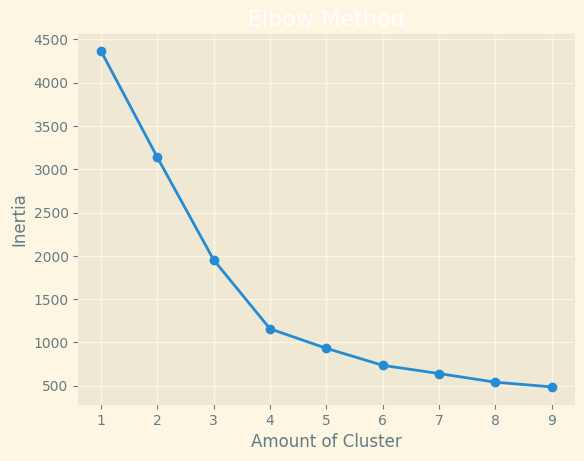

In [182]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(RFM_scaled)
    inertia.append(kmeans.inertia_)
    
plt.style.use('Solarize_Light2')
plt.plot(range(1,10),inertia, marker = 'o')
plt.xlabel('Amount of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

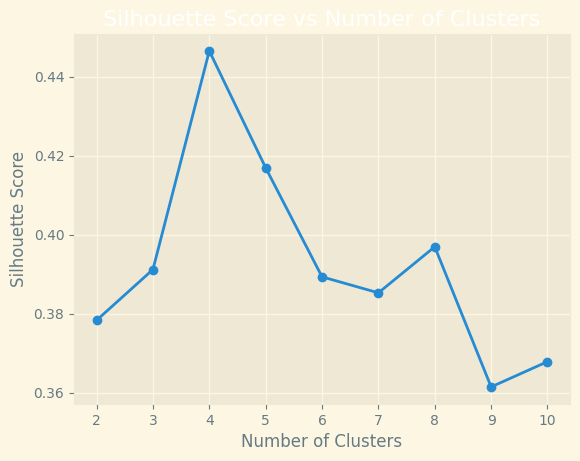

In [181]:
#comparing with Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = kmeans.fit_predict(RFM_scaled)
    score = silhouette_score(RFM_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.style.use('Solarize_Light2')
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Based on **Elbow Method** and **Silhouette-Score**, **4 clusters** is enough for this data. Let's implement it on our data.

In [168]:
kmeans = KMeans(n_clusters=4, random_state = 42)
RFM_DATAFRAME['Cluster'] = kmeans.fit_predict(RFM_scaled)
RFM_DATAFRAME

,customer_id,Frequency,Monetary,Recency,Cluster
0,12346,2,174.98,108,3
1,12347,60,15686.83,60,0
2,12348,23,1689.54,74,3
3,12350,17,1467.45,18,3
4,12356,36,2007.40,108,3
...,...,...,...,...,...
1451,18259,7,860.71,271,1
1452,18260,40,3016.54,88,3
1453,18269,8,166.90,195,1
1454,18277,1,333.80,70,3


In [169]:
#clustering viz
fig = px.scatter_3d(RFM_DATAFRAME,
x = 'Recency',
y= 'Frequency',
z = 'Monetary',
color = 'Cluster',
hover_data = ['Monetary'],
title = 'Customer Segmentation (Recency VS Frequency Vs Monetary)',
color_continuous_scale = 'Viridis' )

fig.show()

What can we infer from this graph?<br />
<br />
**Blue Dotted Customers : Require Activation** <br />
The blue dots represent customers that have very high Recency score, low Monetary spending on our store, with low frequency. These customer type can be considered as **rare customers**. They bought product in our store around 100-300 days since their last transaction. With very low spending in our product and also low frequency. These type of customers are very challenging to be acquired,
**re-engagement will be very important** to do if we don't want these customers to churn.
We can also use their transaction history to make a product recommendation so that they are interested to buy in our stores again. <br />
<br />
**Yellow Dotted Customers : Newcomers** <br />
The yellow one represent customer that spend few money on our product, small recency and also small frequency score which mean they are new customer that come to our store. This is the time when we need to perform perfectly at their first glance! Create a product recommendation for them and give them discount for their second transaction in our store. We can also ask them to promote our store to their friend for a discount coupon at our store. With this strategy we can promote them to Purple Dotted Customers or Potential Customer, while also adding more newcomers to our store. <br />

**Purple Dotted Customers : Potential** <br />
Purple customers probably potential customer for our store. These customers vary from low to high frequency. Mostly these customers do transaction with low-to middle recency, which means most of purple dotted customers recently bought our product not far from their previous transaction. Which also means, that they do transaction frequently on our store. Monetary scores vary from middle to high amount of money.<br />
Best marketing strategy for them? Gave them points after they do their transactions, those points can also be used to redeem discounted price at our store.<br />

**Green Dotted Customers :  VIP** <br >
We can consider these type of customers as 'Can't loose them' customers. Their presence is valuable to our store, although very few of them. They bought lot of product from us, can be seen from the high monetary score. High frequency and very low recency score, which mean they are loyal customer. We can use personalized email to keep them engage with our store, provide them with special discount price for goods that they buy, or probably give them 'loyalty gifts' when they come of age or reach shopping milestone in our store. 

In [170]:
RFM_DATAFRAME['coupon_status'] = clean_sales_df['Coupon_Status']
RFM_DATAFRAME['Cluster'] = RFM_DATAFRAME['Cluster'].astype(str)

cluster_names = {
  '0':'Potential',
  '1':'Require Activation',
  '2':'VIP',
  '3':'Newcomers'
}
RFM_DATAFRAME['Cluster'] = RFM_DATAFRAME['Cluster'].map(cluster_names)

print(RFM_DATAFRAME)

      customer_id  Frequency  Monetary  Recency             Cluster  \
0           12346          2    174.98      108           Newcomers   
1           12347         60  15686.83       60           Potential   
2           12348         23   1689.54       74           Newcomers   
3           12350         17   1467.45       18           Newcomers   
4           12356         36   2007.40      108           Newcomers   
...           ...        ...       ...      ...                 ...   
1451        18259          7    860.71      271  Require Activation   
1452        18260         40   3016.54       88           Newcomers   
1453        18269          8    166.90      195  Require Activation   
1454        18277          1    333.80       70           Newcomers   
1455        18283        102   7356.89       83           Potential   

     coupon_status  
0             Used  
1             Used  
2             Used  
3         Not Used  
4             Used  
...            ...  


In [171]:
cluster_analysis = RFM_DATAFRAME.groupby('Cluster').agg(
    {
        'customer_id' : 'count',
        'Recency' : 'mean',
        'Frequency':'mean',
        'Monetary' : 'mean'
    }).reset_index()

cluster_analysis.columns = ['Cluster','customer_amount', 'Recency','Frequency','Monetary']

fig = px.pie(cluster_analysis, names = 'Cluster',values = 'customer_amount', title = 'Customer Distribution Cluster Chart', hole = 0.3)
fig.update_traces(textposition = 'inside', textinfo ='percent+label')
fig.show()


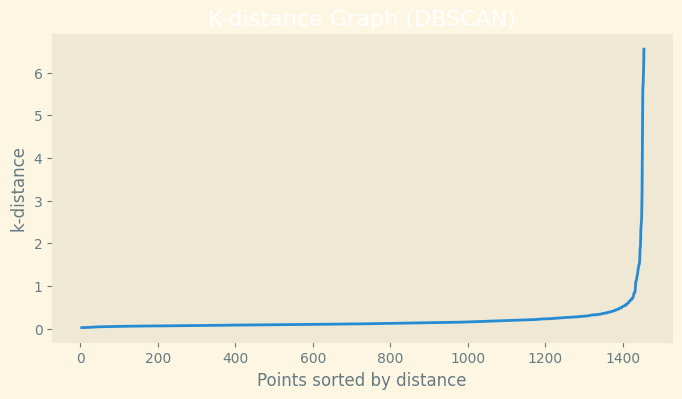

In [180]:
#Compared to DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

rfm_data = RFM_DATAFRAME[['Recency','Frequency','Monetary']].copy()
rfm_data_scaled = scaler.fit_transform(rfm_data)

#Decide how many eps and how many minimum samples for DBSCAN algorithm
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 5)
nbrs = neighbors.fit(rfm_data_scaled)
distances, indices = nbrs.kneighbors(rfm_data_scaled)

k_distances = np.sort(distances[:,4])

plt.style.use('Solarize_Light2')
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.title("K-distance Graph (DBSCAN)")
plt.grid()
plt.show()

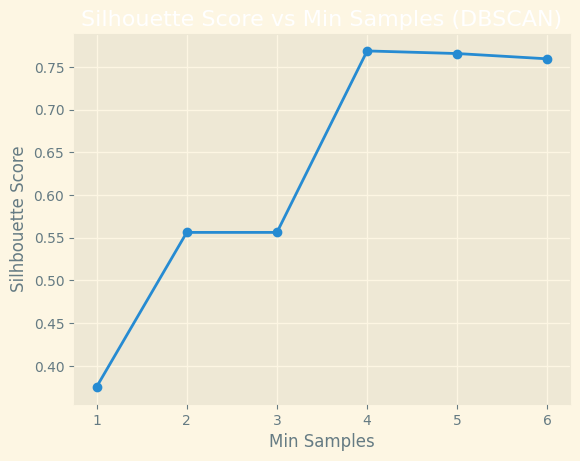

In [179]:
silhouette_scores_dbscan = []
min_sample_values = range(1,7)

for value in min_sample_values:
    dbscan = DBSCAN(eps = 0.7, min_samples = value)
    cluster_labels = dbscan.fit_predict(rfm_data_scaled)
    silhouette_scores_dbscan.append(silhouette_score(rfm_data_scaled, cluster_labels))

#plot silhouette score
plt.style.use('Solarize_Light2')
plt.plot(min_sample_values, silhouette_scores_dbscan,marker = 'o')
plt.title('Silhouette Score vs Min Samples (DBSCAN)')
plt.xlabel('Min Samples')
plt.ylabel('Silhbouette Score')
plt.show()

In [174]:
dbscan = DBSCAN(eps = 0.7, min_samples = 4)
labels = dbscan.fit_predict(rfm_data_scaled)

RFM_DATAFRAME['DBSCAN_Cluster'] = labels

#filter noise
mask = labels != -1
rfm_data_filtered = rfm_data[mask]
labels_filtered = labels[mask]
RFM_DATAFRAME

,customer_id,Frequency,Monetary,Recency,Cluster,coupon_status,DBSCAN_Cluster
0,12346,2,174.98,108,Newcomers,Used,0
1,12347,60,15686.83,60,Potential,Used,0
2,12348,23,1689.54,74,Newcomers,Used,0
3,12350,17,1467.45,18,Newcomers,Not Used,0
4,12356,36,2007.40,108,Newcomers,Used,0
...,...,...,...,...,...,...,...
1451,18259,7,860.71,271,Require Activation,Used,0
1452,18260,40,3016.54,88,Newcomers,Not Used,0
1453,18269,8,166.90,195,Require Activation,Used,0
1454,18277,1,333.80,70,Newcomers,Used,0


In [175]:
fig = px.scatter_3d(RFM_DATAFRAME,
x = 'Recency',
y= 'Frequency',
z = 'Monetary',
color = 'DBSCAN_Cluster',
hover_data = ['Monetary'],
title = 'Customer Segmentation (Recency VS Frequency Vs Monetary [DBSCAN])',
color_continuous_scale = 'picnic' )

fig.show()

### **Comparation of the models**

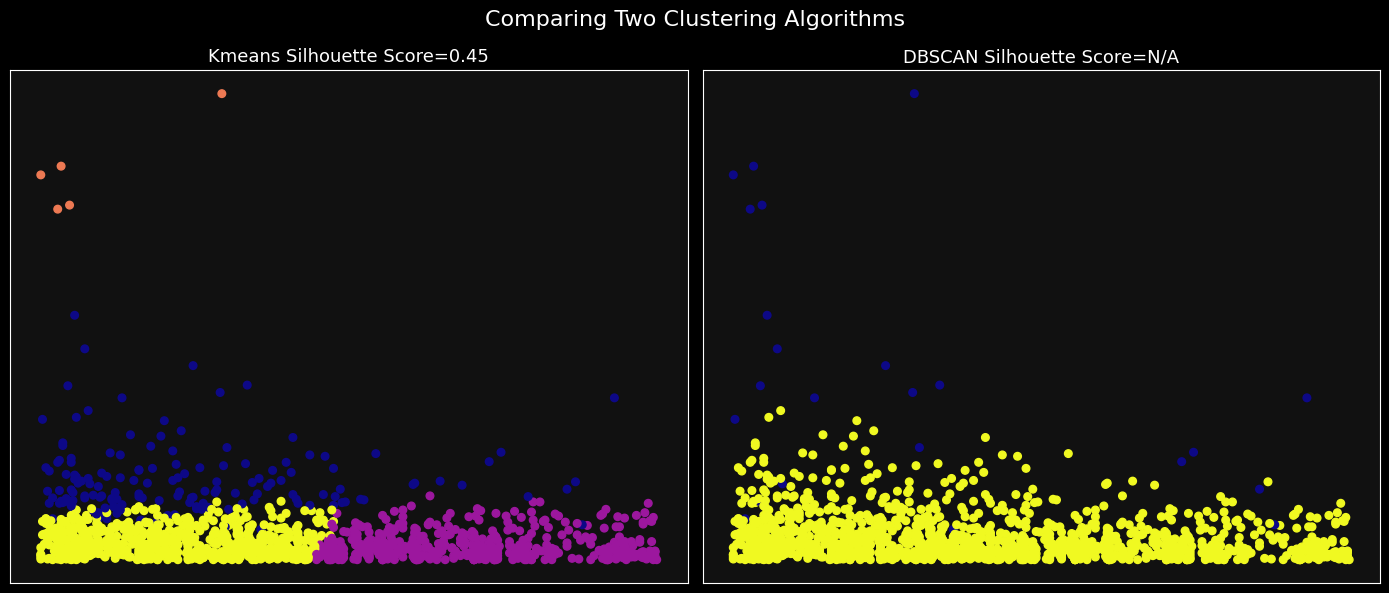

In [176]:
plt.style.use('dark_background')
fig,axes = plt.subplots(1,2, figsize=(14,6))

#calculating silhouette score for DBSCAN
if len(set(RFM_DATAFRAME['DBSCAN_Cluster'])) > 1 and -1 not in set(RFM_DATAFRAME['DBSCAN_Cluster']):
    dbscan_score = silhouette_score(rfm_data_scaled, RFM_DATAFRAME['DBSCAN_Cluster'])
else:
    dbscan_score = 'N/A'


#Kmeans plot
axes[0].scatter(rfm_data['Recency'], rfm_data['Frequency'],c = kmeans.fit_predict(RFM_scaled), cmap = 'plasma', s =30)
axes[0].set_title(f'Kmeans Silhouette Score={round(silhouette_score(rfm_data_scaled,RFM_DATAFRAME['Cluster']),2)}',fontsize = 13)

#plot DBSCAN
axes[1].scatter(rfm_data['Recency'], rfm_data['Frequency'],c = RFM_DATAFRAME['DBSCAN_Cluster'], cmap = 'plasma', s =30)
axes[1].set_title(f'DBSCAN Silhouette Score={dbscan_score}',fontsize = 13)

#styling
for ax in axes:
    ax.set_facecolor('#111')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('Comparing Two Clustering Algorithms', fontsize = 16)
plt.tight_layout()
plt.show()

From this scatter plot, Kmeans silhouette score is way much higher than DBSCAN. Why does this happen? DBSCAN is an algorithm that relies heavily on data distribution. Too much noise and it will fail to cluster. At DBSCAN, -1 cluster is considered as a noise. **Kmeans** is the most appropriate clustering algorithm.

### **Discount Data Distribution** ###

In [177]:
#Discount Data
dsc_df = clean_sales_df.groupby(['Location','Coupon_Status']
).size().reset_index(name ='count')
print(dsc_df)

#labels 
fig = px.pie(
    dsc_df,
    names='Coupon_Status',
    values='count',
    facet_col='Location',
    title='Proporsi Status Kupon Diskon per Negara Bagian',
    hole=0.4 )
fig.show()


         Location Coupon_Status  count
0      California       Clicked   8152
1      California      Not Used   2331
2      California          Used   5285
3         Chicago       Clicked   9156
4         Chicago      Not Used   2853
5         Chicago          Used   6126
6      New Jersey       Clicked   2265
7      New Jersey      Not Used    699
8      New Jersey          Used   1458
9        New York       Clicked   5529
10       New York      Not Used   1652
11       New York          Used   3792
12  Washington DC       Clicked   1371
13  Washington DC      Not Used    423
14  Washington DC          Used    918


Strange things happened here, most of our customer only clicked the discount coupon but never used it! Only 34% of our customer in each of our store location only used the ticket. Based on website opensend.com, digital coupons have an average redemption rate of 7% or higher. Other reason that can be used as an explanation of this phenomena is every discount have limitatons. Based on papers.ssm.com, coupons can only be used when certain conditions are met such as  **minimum spend on certain product**. So that's why most of our customer only **clicked the discount** and **never used it**. 

## **Conclusion**

1.Answer for 1st goal : Most of the company revenue fulfilled by Nest-USA products with 54% percentage. With total yearly revenue of 2,383,642 USD.

2.Product that mostly bought by the customer are 'Office Equipment' category with 88383 units sold. 

3.Our online spend and offline marketing spend positively correlates with clean income

4.We spend so much money everyday for marketing campaign

5.Peak of AOV reached by Washington DC customer (182.46 USD) in February, second peak reached by New Jersey customer in April(142.77 USD). Let's find out what product that had been bought by Washington DC customer in February

6.After checking on product's prices, only NEST-CANADA products have the priciest unit price with mean unit price USD 151, but only few customer bought the product. Second place gained by NEST-USA product which have unit price USD 122.54, not only pricy amount of transaction related to this product was the largest, with amount of transaction are 66 transactions.

7.Our CAC is very large with **CAC value to the power of 5 or 6**, indicating that our spend for marketing campaign is so high, but the addition of new customer per month is very small. Our marketing strategy is not that successful and efficient

8.All our MER (Marketing Efficieny Ratio) are under 1

9.Our RCR values are between 78% and 91%. This is a **good sign**, most of our customers are back to buy again at our store

10.**Repeat Customer Rate can be considered as healthy**, although **cost to gain new customer is very expensive**.

11.To gain more customer, we can use **clustering algorithm** to segmentized customer and decide what marketing approach that can be applied to each cluster.<br />

**Here is summary of analysis about each cluster and strategy that can be applied to them** 
<br />
**Blue Dotted Customers : Require Activation** <br />
The blue dots represent customers that have very high Recency score, low Monetary spending on our store, with low frequency. These customer type can be considered as **rare customers**. They bought product in our store around 100-300 days since their last transaction. With very low spending in our product and also low frequency. These type of customers are very challenging to be acquired,
**re-engagement will be very important** to do if we don't want these customers to churn.
We can also use their transaction history to make a product recommendation so that they are interested to buy in our stores again. <br />
<br />
**Yellow Dotted Customers : Newcomers** <br />
The yellow one represent customer that spend few money on our product, small recency and also small frequency score which mean they are new customer that come to our store. This is the time when we need to perform perfectly at their first glance! Create a product recommendation for them and give them discount for their second transaction in our store. We can also ask them to promote our store to their friend for a discount coupon at our store. With this strategy we can promote them to Purple Dotted Customers or Potential Customer, while also adding more newcomers to our store. <br />

**Purple Dotted Customers : Potential** <br />
Purple customers probably potential customer for our store. These customers vary from low to high frequency. Mostly these customers do transaction with low-to middle recency, which means most of purple dotted customers recently bought our product not far from their previous transaction. Which also means, that they do transaction frequently on our store. Monetary scores vary from middle to high amount of money.<br />
Best marketing strategy for them? Gave them points after they do their transactions, those points can also be used to redeem discounted price at our store.<br />

**Green Dotted Customers :  VIP** <br >
We can consider these type of customers as 'Can't loose them' customers. Their presence is valuable to our store, although very few of them. They bought lot of product from us, can be seen from the high monetary score. High frequency and very low recency score, which mean they are loyal customer. We can use personalized email to keep them engage with our store, provide them with special discount price for goods that they buy, or probably give them 'loyalty gifts' when they come of age or reach shopping milestone in our store. 

12.Customer mostly clicked on our discunt but never used it. this because we set a limit on minimum spend to use the discount. Some customers probably clicked the discount to check whether they can use it, and then refuse to use it after looking at the condition that must be met. So that's why most of our customer only **clicked the discount** and **never used it**.
